In [1]:
#Import Stuff
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import scipy

The relationship between the discreet and continuous distributions is important because we sometimes need/want to transform our data between the two. 

One example from real life is your GPA - when you do assignments/exams, you end up with a raw percentage grade which is continuous. When this is converted to a letter scale (A, B, etc...), that letter scale is discreet - there's only a selection of possible values (b-,b,b+, etc...). This is binning. We take a continuous varaible and create a discreet variable from it. 
The other example is when your GPA is caclulated - those discreet values are assigned numbers on a 1-4 scale, then averaged together creating a new continuous value - your GPA.

One place where this is commonly used is lending and credit scores. Having a credit score of 752 vs 764 makes no difference, you're placed in a category of "excellent", "very good", etc...


In [3]:
#Load data
df = pd.read_csv("loan_data.csv")
df.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [4]:
#Create credit-score bucket.
df["grade"] = " "
scoreCol = df.columns.get_loc("fico")
gradeCol = df.columns.get_loc("grade")

for i in range(len(df)) :
    if df.iloc[i,scoreCol] < 580:
        #print("Less than 580-"+str(df.iloc[i,scoreCol]))
        df.iloc[i,gradeCol] = "subprime"
    elif df.iloc[i,scoreCol] < 670:
        #print("580-670-"+str(df.iloc[i,scoreCol]))
        df.iloc[i,gradeCol] = "fair"
    elif df.iloc[i,scoreCol] < 740:
        #print("670-740-"+str(df.iloc[i,scoreCol]))
        df.iloc[i,gradeCol] = "good"
    elif df.iloc[i,scoreCol] < 800:
        #print("740-800-"+str(df.iloc[i,scoreCol]))
        df.iloc[i,gradeCol] = "very good"
    else:
        #print("800+-"+str(df.iloc[i,scoreCol]))
        df.iloc[i,gradeCol] = "excellent"
#print(str(scoreCol)+ " "+ str(gradeCol))
df.head(25)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,grade
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,good
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,good
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,good
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,good
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,fair
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0,good
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1,fair
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1,good
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0,good
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0,good


In [5]:
#In generic cases, we can automate this:
bins = np.arange(580, 860, 60) #or
bins = np.array([580, 670, 740, 800])
indicies = np.digitize(df["fico"], bins)
groups = df.groupby(indicies)
for i, group in groups:
    print(i, group["fico"].min(), len(group), np.exp(group["log.annual.inc"]).mean())

1 612 1341 60231.432107263354
2 672 6007 67593.95498610557
3 742 2085 74025.49061873481
4 802 145 96581.13203052751


In [6]:
#Graph
#hist2 = thinkstats2.Hist(round(df["fico"], -1))
hist2 = thinkstats2.Hist(df["fico"])
pmf2 = thinkstats2.Pmf(df["fico"])
cdf2 = thinkstats2.Cdf(df["fico"])

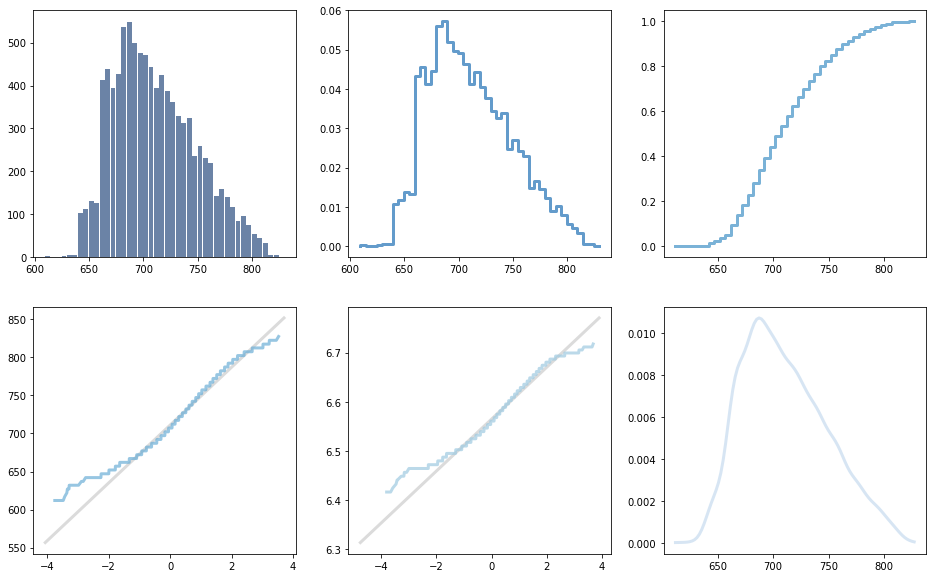

In [7]:
#Create graphs
thinkplot.PrePlot(6, rows =2, cols=3)
thinkplot.Hist(hist2)
thinkplot.SubPlot(2)
thinkplot.Pmf(pmf2)
thinkplot.SubPlot(3)
thinkplot.Cdf(cdf2)
thinkplot.SubPlot(4)
thinkstats2.NormalProbabilityPlot(df["fico"])
thinkplot.SubPlot(5)
thinkstats2.NormalProbabilityPlot(np.log(df["fico"]))
thinkplot.SubPlot(6)
pdf = thinkstats2.EstimatedPdf(df["fico"]) #See more below
thinkplot.Pdf(pdf)
thinkplot.Config()

C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


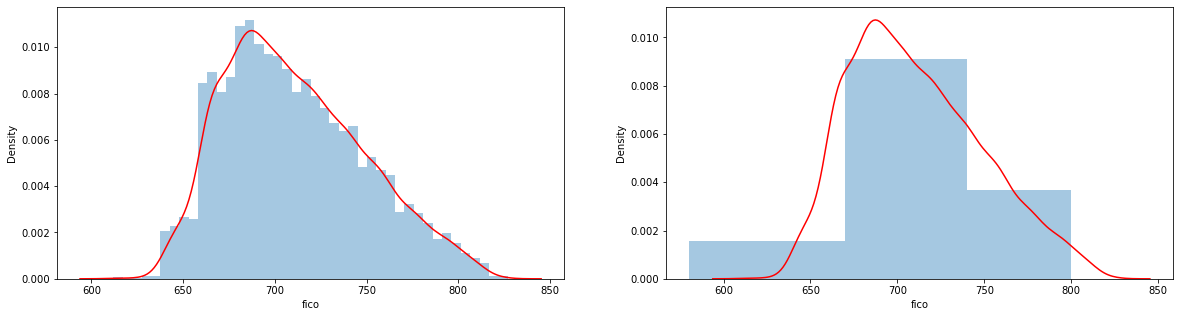

In [8]:
#We can use fancy graphs (more next chapter) to make it pretty
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5) #makes the default size larger. 
#Everything after the comma is optional. 
fig, ax = plt.subplots(1,2)
sns.distplot(df["fico"], kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[0])
sns.distplot(df["fico"], bins=bins, kde_kws={"color":"red", "label":"KDE"}, hist_kws={"label":"Data"}, ax=ax[1])
plt.show()

As above - the KDE produces a smoothed function, and approximates the distribution of the histogram.

The smaller those bins get, the closer of an approximation. The smoothing factor accounts for 'noise' - e.g. around 750ish. 


Skewness. We can visually see the skew - this one is right skewed a bit - the right side is "stretched" out a bit more. We can verify with caclculations...

In [9]:
#Skew # if mean is bigger than median then it is skewed to the right (positive)
skw = thinkstats2.PearsonMedianSkewness(df["fico"])
print(df["fico"].mean())
print(df["fico"].median())
print(skw)

710.8463144706619
707.0
0.30390788935426843


We can show it a little more clearly on the graph by adding some reference lines for mean and median.

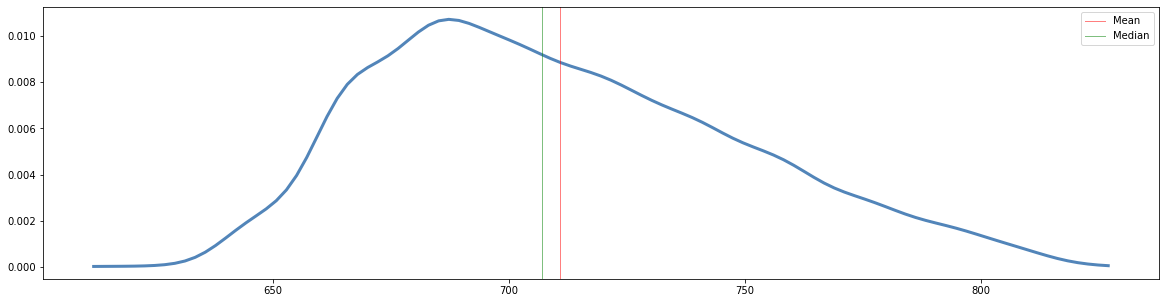

In [10]:
thinkplot.PrePlot(1)
thinkplot.Pdf(pdf)
thinkplot.axvline(df["fico"].mean(), color="Red", label="Mean")
thinkplot.axvline(df["fico"].median(), color="Green", label="Median")
thinkplot.Config()

We can explore a different varaible similarly - income. 

We are given the income in log format. Why might that be? Can you investigate a little, and add normal income to the dataframe?

In [ ]:
#create a new column - income. This should show the regular income, not log transformed. 

In [ ]:
#Challenge - try to create a function that makes the suite of 6 graphs above.

In [ ]:
#Graph - If function wasn't created. 

In [ ]:
#Create graphs

In [ ]:
#Try to use the data - break into groups of marginal tax rates:
#15% on the first $49,020 of taxable income, plus
#20.5% on the next $49,020 of taxable income (on the portion of taxable income over 49,020 up to $98,040), plus
#26% on the next $53,939 of taxable income (on the portion of taxable income over $98,040 up to $151,978), plus
#29% on the next $64,533 of taxable income (on the portion of taxable income over 151,978 up to $216,511), plus
#33% of taxable income over $216,511

In [ ]:
#Create the 6 graph set of graphs for original log income

In [ ]:
#Use the data to estimate the number of people in each tax bracket

In [ ]:
#Use the cdf to estimate the number of people who earn Teacher Money - lowest: 59,357, highest: 101,162

In [ ]:
#Create a KDE showing the distributiion of income.
#Try both log income, and raw income. 

In [ ]:
#Challenge - Create a function that takes an income and returns a tax bill, and marginal tax rate:
def muhTaxes(income):
    return taxbill, margRate